# This demo
This demo is meant to demonstrate the basic concepts of a federated learning approach. The task used for this demonstration is a very simple function estimation. The setups is very simplified, we wont use different hardware per node and won't train in parallel but sequentially.

In [54]:
### imports

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as opt
from sklearn.model_selection import train_test_split

## Federated leaning setup
We will use an example in which we have three nodes. In reality $N$ is much larger, in ome cases $N$ is much larger than the amount of trainings data per node. For demonstration purposes $N=3$ will suffice.

In [56]:
### Hyperparameter federated learning

N=3 # Number of nodes

## Example task
We will use the most general task, a fully connected network can solve; function fitting. Since we focus on federated learning and not the network architecture, we will try to fit a very simple polynomial. in our case $f(x)=x^3-5x$.

In [55]:
### Parameter of Example

NOISE = True # add noise to trainings data
SHUFFLE = True # shuffle some elements between nodes randomly
SUPPORT = (-2.8, 2.8) # support of function
PITCH = 0.002 # pitch between equally spaced samples

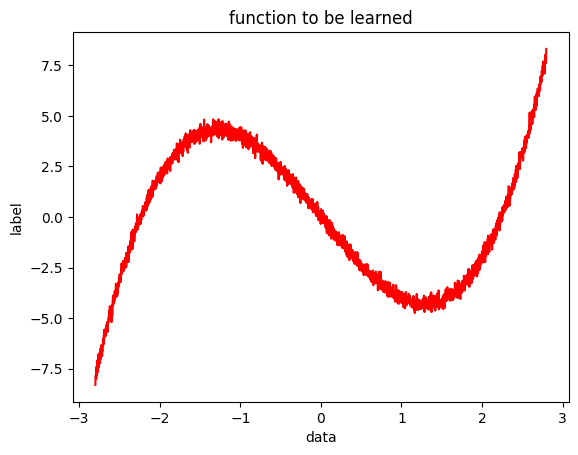

In [59]:
### Label generating function to be learned

def f (x):
  return x*x*x -5*x # simple polynomial of third degree

# plot function
data = np.arange(SUPPORT[0],SUPPORT[1],PITCH)
label = f(data)

# add label noise
if NOISE:
  add_noise = np.random.normal(0,0.2,data.shape) # The noise level can be modified.
  label+=add_noise

plt.plot(data, label, color='red')
plt.title("function to be learned")
plt.xlabel('data')
plt.ylabel('label')
plt.show()

## Data distribution
We now have data $(x,y)$ where $x$ is the data and $y$ the corresponding label. We now have to distribute the data across our nodes.

(2, 2800)


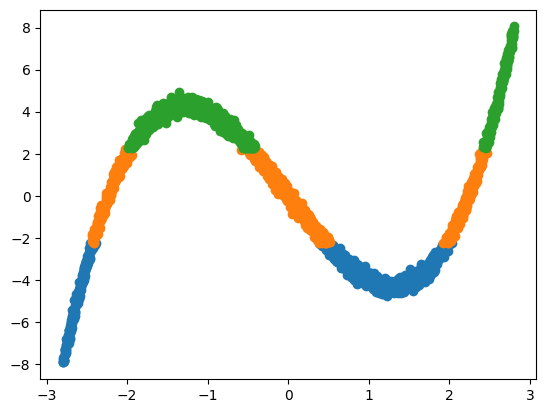

In [53]:
### create datasets

glob_dataset = np.hstack((data[:,np.newaxis], label[:,np.newaxis]))
indices = np.argsort(glob_dataset[:,1])
glob_dataset = np.asarray([(glob_dataset[i,0],glob_dataset[i,1]) for i in indices])

# split dataset in N parts
split = np.array_split(glob_dataset, N)
for sub_set in split:
  plt.scatter(sub_set[:,0],sub_set[:,1])
plt.title("scatter plot of splitted dataset")
plt.xlabel('data')
plt.ylabel('label')
plt.show()



## Non-IIDness of datasplit
An identically distributed split would mean, that each split would have been sampled from the same distribution. In this example this would translate to a uniform sampling of datapoints within the support of the function. This is equivalent to randomly assigning an equal amount of data, label pairs to the nodes.
This obviously is not the case here. Since $

In [49]:
### set hyper parameter
num_params_per_layer = 16 # number of nodes in the hidden layer set to a low nomber for easier anlysis
num_epochs = 150 # number of epochs to be trained. This number is chosen very
#high to even give larger networks the chance to converge
noise = True # allows for adding noise to the labels of the training data